In [1]:
import codecs
from os import path
import pandas as pd
import pdb
import logging
import re
from gensim import parsing
import gensim
from gensim.parsing.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import classification_report

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
training_file = path.join('semeval2016-task6-trainingdata.txt')
training_data = pd.read_csv(training_file, header=0, delimiter='\t')

In [4]:
testing_file = path.join('SemEval2016-Task6-subtaskA-testdata-gold.txt')
testing_data = pd.read_csv(testing_file,header=0, delimiter='\t')

In [5]:
def preprocess(text):
    #convert text to lower case
    text = text.lower()
   
    #removing whitespace
    text.strip()

    #removing digits
    text = gensim.parsing.preprocessing.strip_numeric(text)
    #text = ' '.join(s for s in text.split() if not any(c.isdigit() for c in s))
    
    #remove stopwords
    text = gensim.parsing.preprocessing.remove_stopwords(text)
    
    #strip punctutation
    text = gensim.parsing.preprocessing.strip_punctuation(text)
    
    #strip multiple whitepsace that might occur after we remove stopwords
    text = gensim.parsing.preprocessing.strip_multiple_whitespaces(text)

    p = PorterStemmer()
    
    text = ' '.join(p.stem(word) for word in text.split())    

    #print(text)
    
    return text

In [6]:
training_data['Tweet'] = training_data['Tweet'].map(preprocess)
testing_data['Tweet'] = testing_data['Tweet'].map(preprocess)

In [7]:
training_data_Abortion = training_data[training_data.Target == 'Legalization of Abortion']
training_data_Atheism = training_data[training_data.Target == 'Atheism']
training_data_Climate = training_data[training_data.Target == 'Climate Change is a Real Concern']
training_data_Feminist = training_data[training_data.Target == 'Feminist Movement']
training_data_Hillary = training_data[training_data.Target == 'Hillary Clinton']
testing_data_Abortion = testing_data[testing_data.Target == 'Legalization of Abortion']
testing_data_Atheism = testing_data[testing_data.Target == 'Atheism']
testing_data_Climate = testing_data[testing_data.Target == 'Climate Change is a Real Concern']
testing_data_Feminist = testing_data[testing_data.Target == 'Feminist Movement']
testing_data_Hillary = testing_data[testing_data.Target == 'Hillary Clinton']

In [8]:
training_data_Abortion

,ID,Target,Tweet,Stance
2211,2312,Legalization of Abortion,don t understand peopl pro choic life life mat...,AGAINST
2212,2313,Legalization of Abortion,let s agre it s ok kill lb babi uteru dwstweet...,AGAINST
2213,2314,Legalization of Abortion,glennbeck like poll abort doctor told woman no...,AGAINST
2214,2315,Legalization of Abortion,democrat personhood perceiv legisl recogn pers...,AGAINST
2215,2316,Legalization of Abortion,cultureshift if don t draw line i ve arbitrari...,NONE
...,...,...,...,...
2809,2910,Legalization of Abortion,there s law protect unborn eagl human uh idk y...,AGAINST
2810,2911,Legalization of Abortion,abort abortionondemand menstruationmatt semst,AGAINST
2811,2912,Legalization of Abortion,dare sexual prefer choic dare dismemb preborn ...,AGAINST
2812,2913,Legalization of Abortion,equal right born wai right born liberallog lib...,AGAINST


In [9]:
testing_data_Abortion

,ID,Target,Tweet,Stance
969,10970,Legalization of Abortion,need prolif r e agent support prolif group u c...,AGAINST
970,10971,Legalization of Abortion,childcar program joanburton said place lonepar...,AGAINST
971,10972,Legalization of Abortion,request petit save whale stop slaughter babi w...,AGAINST
972,10973,Legalization of Abortion,christ see us we god thing remeb look past sin...,AGAINST
973,10974,Legalization of Abortion,prayer babi urgent prayer lexington ky two dal...,AGAINST
...,...,...,...,...
1244,11245,Legalization of Abortion,metalheadmonti tom six follow watch human cent...,NONE
1245,11246,Legalization of Abortion,aveng blood rememb ignor afflict ps comequickl...,AGAINST
1246,11247,Legalization of Abortion,life sacr level abort comput philosophi kate m...,AGAINST
1247,11248,Legalization of Abortion,ravensymon u refer we you minor idiot support ...,AGAINST


In [10]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=1.0, min_df=1, 
                              binary=True, norm='l2', use_idf=True, 
                              smooth_idf=False, sublinear_tf=True, encoding='latin1')

# 1.Abortion

# 1.1 uncertainty_sampling

In [11]:
X_train_pool = np.asarray([stance for stance in training_data_Abortion["Tweet"]])
Y_train_pool = np.asarray([stance for stance in training_data_Abortion["Stance"]])
X_test_pool = np.asarray([stance for stance in testing_data_Abortion["Tweet"]])
Y_test_pool = np.asarray([stance for stance in testing_data_Abortion["Stance"]])

In [12]:
training_data_Abortion["Tweet"]

2211    don t understand peopl pro choic life life mat...
2212    let s agre it s ok kill lb babi uteru dwstweet...
2213    glennbeck like poll abort doctor told woman no...
2214    democrat personhood perceiv legisl recogn pers...
2215    cultureshift if don t draw line i ve arbitrari...
                              ...                        
2809    there s law protect unborn eagl human uh idk y...
2810        abort abortionondemand menstruationmatt semst
2811    dare sexual prefer choic dare dismemb preborn ...
2812    equal right born wai right born liberallog lib...
2813    potu seal legaci w doz win gop agenda still re...
Name: Tweet, Length: 603, dtype: object

In [13]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

In [14]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_pool.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_pool[training_indices]
y_training = Y_train_pool[training_indices]



In [15]:
X_pool = np.delete(X_train_pool,training_indices,axis=0)
y_pool = np.delete(Y_train_pool,training_indices,axis=0)

In [16]:
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_pool)
X_pool_tifd = vectorizer.transform(X_pool)

In [17]:
# Y_test_pool = np.asarray([stance for stance in Y_test_pool])

In [18]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=uncertainty_sampling
)


In [19]:
X_testing.shape

(280, 42)

In [20]:
unqueried_score = learner.score(X_testing, Y_test_pool)

In [21]:
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [22]:
N_QUERIES = 30
performance_history_uncertainty_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_pool)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_uncertainty_sampling.append(model_accuracy)

Accuracy after query 1: 0.6750
Accuracy after query 2: 0.5393
Accuracy after query 3: 0.1643
Accuracy after query 4: 0.5393
Accuracy after query 5: 0.5393
Accuracy after query 6: 0.5107
Accuracy after query 7: 0.5107
Accuracy after query 8: 0.1643
Accuracy after query 9: 0.1643
Accuracy after query 10: 0.1643
Accuracy after query 11: 0.5750
Accuracy after query 12: 0.5643
Accuracy after query 13: 0.5750
Accuracy after query 14: 0.5750
Accuracy after query 15: 0.5607
Accuracy after query 16: 0.5607
Accuracy after query 17: 0.5607
Accuracy after query 18: 0.5607
Accuracy after query 19: 0.5607
Accuracy after query 20: 0.5607
Accuracy after query 21: 0.5607
Accuracy after query 22: 0.5643
Accuracy after query 23: 0.5643
Accuracy after query 24: 0.5643
Accuracy after query 25: 0.5643
Accuracy after query 26: 0.5643
Accuracy after query 27: 0.5643
Accuracy after query 28: 0.5643
Accuracy after query 29: 0.5643
Accuracy after query 30: 0.5643


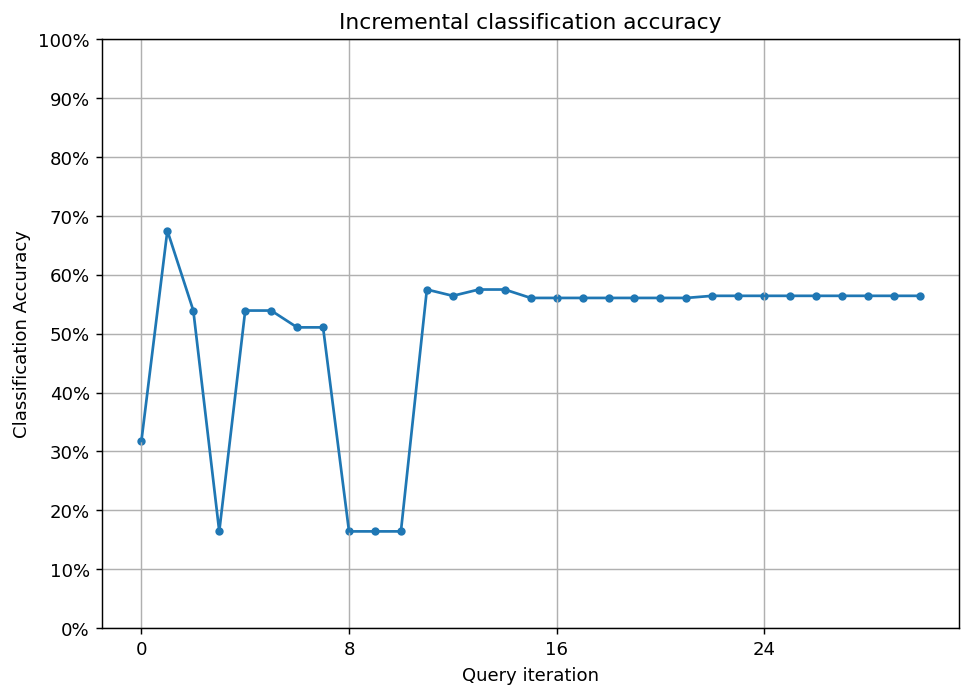

In [23]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_uncertainty_sampling)
ax.scatter(range(len(performance_history_uncertainty_sampling)), performance_history_uncertainty_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 1.2 margin_sampling

In [24]:
X_train_margin = np.asarray([stance for stance in training_data_Abortion["Tweet"]])
Y_train_margin = np.asarray([stance for stance in training_data_Abortion["Stance"]])
X_test_margin = np.asarray([stance for stance in testing_data_Abortion["Tweet"]])
Y_test_margin = np.asarray([stance for stance in testing_data_Abortion["Stance"]])

In [25]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_margin.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_margin[training_indices]
y_training = Y_train_margin[training_indices]
X_pool = np.delete(X_train_margin,training_indices,axis=0)
y_pool = np.delete(Y_train_margin,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_margin)
X_pool_tifd = vectorizer.transform(X_pool)

In [26]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=margin_sampling
)


In [27]:
unqueried_score = learner.score(X_testing, Y_test_margin)

In [28]:
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [30]:
N_QUERIES = 30
performance_history_margin_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_margin)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_margin_sampling.append(model_accuracy)

Accuracy after query 1: 0.5393
Accuracy after query 2: 0.1643
Accuracy after query 3: 0.1643
Accuracy after query 4: 0.1643
Accuracy after query 5: 0.3036
Accuracy after query 6: 0.6750
Accuracy after query 7: 0.6750
Accuracy after query 8: 0.6750
Accuracy after query 9: 0.6750
Accuracy after query 10: 0.6750
Accuracy after query 11: 0.6750
Accuracy after query 12: 0.6750
Accuracy after query 13: 0.6750
Accuracy after query 14: 0.6750
Accuracy after query 15: 0.6750
Accuracy after query 16: 0.6750
Accuracy after query 17: 0.6750
Accuracy after query 18: 0.6750
Accuracy after query 19: 0.6750
Accuracy after query 20: 0.6750
Accuracy after query 21: 0.3286
Accuracy after query 22: 0.6750
Accuracy after query 23: 0.6750
Accuracy after query 24: 0.6750
Accuracy after query 25: 0.6750
Accuracy after query 26: 0.6750
Accuracy after query 27: 0.6750
Accuracy after query 28: 0.6750
Accuracy after query 29: 0.6750
Accuracy after query 30: 0.6750


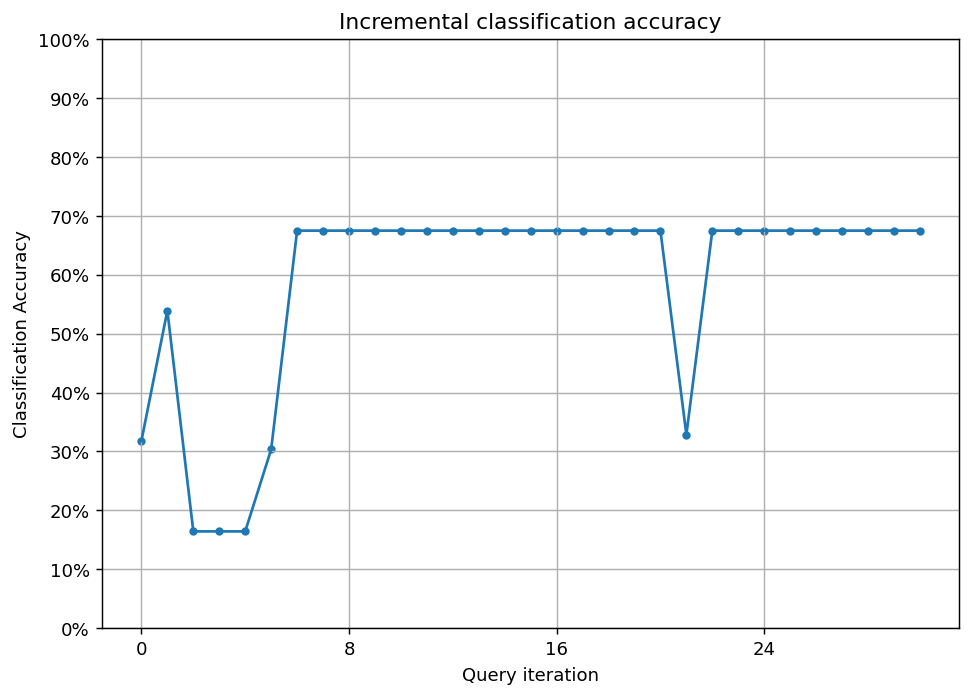

In [31]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_margin_sampling)
ax.scatter(range(len(performance_history_margin_sampling)), performance_history_margin_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 1.3 entropy_sampling

In [32]:
X_train_entropy = np.asarray([stance for stance in training_data_Abortion["Tweet"]])
Y_train_entropy = np.asarray([stance for stance in training_data_Abortion["Stance"]])
X_test_entropy = np.asarray([stance for stance in testing_data_Abortion["Tweet"]])
Y_test_entropy = np.asarray([stance for stance in testing_data_Abortion["Stance"]])

In [33]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_entropy.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_entropy[training_indices]
y_training = Y_train_entropy[training_indices]
X_pool = np.delete(X_train_entropy,training_indices,axis=0)
y_pool = np.delete(Y_train_entropy,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_entropy)
X_pool_tifd = vectorizer.transform(X_pool)

In [34]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=entropy_sampling
)

In [35]:
unqueried_score = learner.score(X_testing, Y_test_entropy)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [36]:
N_QUERIES = 30
performance_history_entropy_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_entropy)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_entropy_sampling.append(model_accuracy)

Accuracy after query 1: 0.6750
Accuracy after query 2: 0.5393
Accuracy after query 3: 0.1643
Accuracy after query 4: 0.5393
Accuracy after query 5: 0.5393
Accuracy after query 6: 0.5107
Accuracy after query 7: 0.5214
Accuracy after query 8: 0.5250
Accuracy after query 9: 0.5107
Accuracy after query 10: 0.5107
Accuracy after query 11: 0.5286
Accuracy after query 12: 0.5607
Accuracy after query 13: 0.5607
Accuracy after query 14: 0.5607
Accuracy after query 15: 0.1857
Accuracy after query 16: 0.1857
Accuracy after query 17: 0.1893
Accuracy after query 18: 0.1893
Accuracy after query 19: 0.2964
Accuracy after query 20: 0.2964
Accuracy after query 21: 0.3000
Accuracy after query 22: 0.3321
Accuracy after query 23: 0.3429
Accuracy after query 24: 0.3286
Accuracy after query 25: 0.6750
Accuracy after query 26: 0.3286
Accuracy after query 27: 0.3143
Accuracy after query 28: 0.3143
Accuracy after query 29: 0.3143
Accuracy after query 30: 0.3143


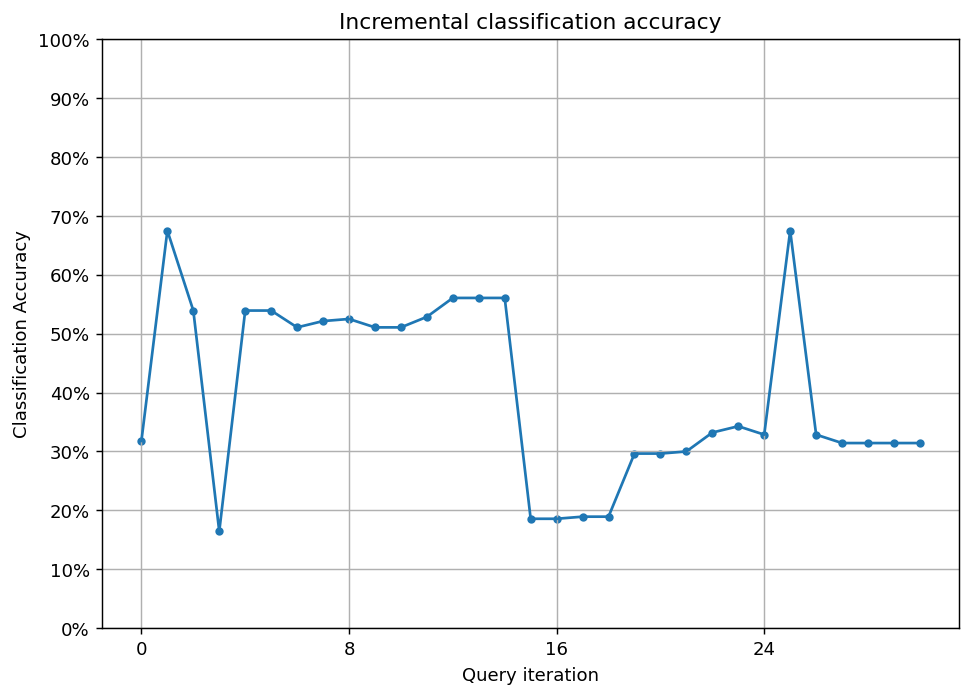

In [37]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_entropy_sampling)
ax.scatter(range(len(performance_history_entropy_sampling)), performance_history_entropy_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 2. Atheism

# 2.1 uncertainty_sampling

In [38]:
X_train_atheism_uncertainty = np.asarray([stance for stance in training_data_Atheism["Tweet"]])
Y_train_atheism_uncertainty = np.asarray([stance for stance in training_data_Atheism["Stance"]])
X_test_atheism_uncertainty = np.asarray([stance for stance in testing_data_Atheism["Tweet"]])
Y_test_atheism_uncertainty = np.asarray([stance for stance in testing_data_Atheism["Stance"]])

In [39]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_atheism_uncertainty.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_atheism_uncertainty[training_indices]
y_training = Y_train_atheism_uncertainty[training_indices]
X_pool = np.delete(X_train_atheism_uncertainty,training_indices,axis=0)
y_pool = np.delete(Y_train_atheism_uncertainty,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_atheism_uncertainty)
X_pool_tifd = vectorizer.transform(X_pool)

In [40]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=uncertainty_sampling
)

In [41]:
unqueried_score = learner.score(X_testing, Y_test_atheism_uncertainty)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [42]:
N_QUERIES = 30
performance_history_atheism_uncertainty_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_atheism_uncertainty)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_atheism_uncertainty_sampling.append(model_accuracy)

Accuracy after query 1: 0.6818
Accuracy after query 2: 0.1273
Accuracy after query 3: 0.7091
Accuracy after query 4: 0.7182
Accuracy after query 5: 0.7182
Accuracy after query 6: 0.7182
Accuracy after query 7: 0.7182
Accuracy after query 8: 0.7182
Accuracy after query 9: 0.7182
Accuracy after query 10: 0.7136
Accuracy after query 11: 0.7136
Accuracy after query 12: 0.7136
Accuracy after query 13: 0.7136
Accuracy after query 14: 0.7136
Accuracy after query 15: 0.7136
Accuracy after query 16: 0.7136
Accuracy after query 17: 0.7136
Accuracy after query 18: 0.7136
Accuracy after query 19: 0.7136
Accuracy after query 20: 0.7136
Accuracy after query 21: 0.7136
Accuracy after query 22: 0.7136
Accuracy after query 23: 0.7136
Accuracy after query 24: 0.7136
Accuracy after query 25: 0.7136
Accuracy after query 26: 0.7136
Accuracy after query 27: 0.7136
Accuracy after query 28: 0.7136
Accuracy after query 29: 0.7136
Accuracy after query 30: 0.7136


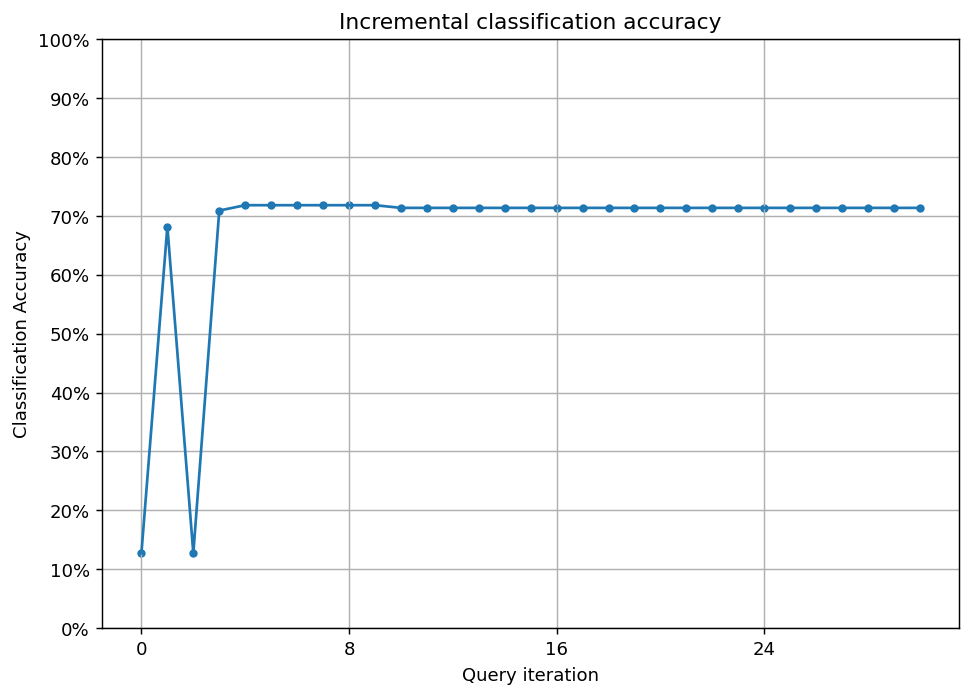

In [43]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_atheism_uncertainty_sampling)
ax.scatter(range(len(performance_history_atheism_uncertainty_sampling)), performance_history_atheism_uncertainty_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 2.2 margin_sampling

In [44]:
X_train_atheism_margin = np.asarray([stance for stance in training_data_Atheism["Tweet"]])
Y_train_atheism_margin = np.asarray([stance for stance in training_data_Atheism["Stance"]])
X_test_atheism_margin = np.asarray([stance for stance in testing_data_Atheism["Tweet"]])
Y_test_atheism_margin = np.asarray([stance for stance in testing_data_Atheism["Stance"]])

In [45]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_atheism_margin.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_atheism_margin[training_indices]
y_training = Y_train_atheism_margin[training_indices]
X_pool = np.delete(X_train_atheism_margin,training_indices,axis=0)
y_pool = np.delete(Y_train_atheism_margin,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_atheism_margin)
X_pool_tifd = vectorizer.transform(X_pool)

In [46]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=margin_sampling
)

In [47]:
unqueried_score = learner.score(X_testing, Y_test_atheism_margin)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [48]:
N_QUERIES = 30
performance_history_atheism_margin_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_atheism_margin)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_atheism_margin_sampling.append(model_accuracy)

Accuracy after query 1: 0.6818
Accuracy after query 2: 0.1273
Accuracy after query 3: 0.7091
Accuracy after query 4: 0.7182
Accuracy after query 5: 0.7182
Accuracy after query 6: 0.7182
Accuracy after query 7: 0.7182
Accuracy after query 8: 0.7182
Accuracy after query 9: 0.7182
Accuracy after query 10: 0.7136
Accuracy after query 11: 0.7136
Accuracy after query 12: 0.7136
Accuracy after query 13: 0.7136
Accuracy after query 14: 0.7136
Accuracy after query 15: 0.7136
Accuracy after query 16: 0.7136
Accuracy after query 17: 0.7182
Accuracy after query 18: 0.7182
Accuracy after query 19: 0.7182
Accuracy after query 20: 0.7182
Accuracy after query 21: 0.7182
Accuracy after query 22: 0.7182
Accuracy after query 23: 0.7182
Accuracy after query 24: 0.7182
Accuracy after query 25: 0.7182
Accuracy after query 26: 0.7182
Accuracy after query 27: 0.7182
Accuracy after query 28: 0.7136
Accuracy after query 29: 0.7136
Accuracy after query 30: 0.7136


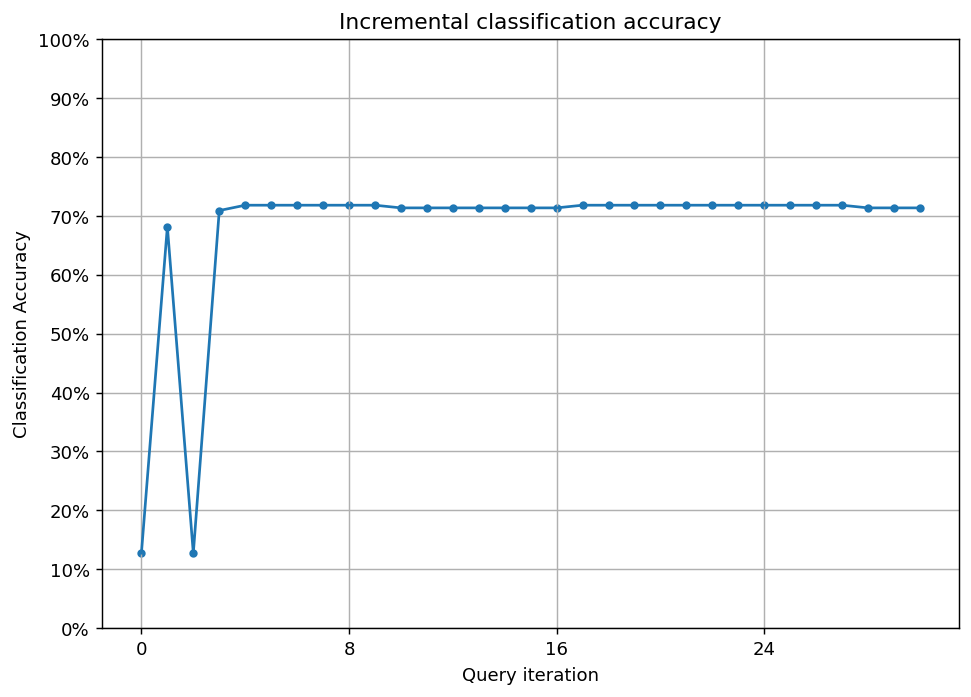

In [49]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_atheism_margin_sampling)
ax.scatter(range(len(performance_history_atheism_margin_sampling)), performance_history_atheism_margin_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 2.3 entropy_sampling

In [50]:
X_train_atheism_entropy = np.asarray([stance for stance in training_data_Atheism["Tweet"]])
Y_train_atheism_entropy = np.asarray([stance for stance in training_data_Atheism["Stance"]])
X_test_atheism_entropy = np.asarray([stance for stance in testing_data_Atheism["Tweet"]])
Y_test_atheism_entropy = np.asarray([stance for stance in testing_data_Atheism["Stance"]])

In [51]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_atheism_entropy.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_atheism_entropy[training_indices]
y_training = Y_train_atheism_entropy[training_indices]
X_pool = np.delete(X_train_atheism_entropy,training_indices,axis=0)
y_pool = np.delete(Y_train_atheism_entropy,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_atheism_entropy)
X_pool_tifd = vectorizer.transform(X_pool)

In [52]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=entropy_sampling
)
unqueried_score = learner.score(X_testing, Y_test_atheism_entropy)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [53]:
N_QUERIES = 30
performance_history_atheism_entropy_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd)
    X = X_pool[query_index]
    X = vectorizer.transform(X).reshape(1, -1)
    y = y_pool[query_index].reshape(1, )
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_atheism_entropy)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_atheism_entropy_sampling.append(model_accuracy)

Accuracy after query 1: 0.6818
Accuracy after query 2: 0.1273
Accuracy after query 3: 0.7091
Accuracy after query 4: 0.7182
Accuracy after query 5: 0.7182
Accuracy after query 6: 0.7182
Accuracy after query 7: 0.7182
Accuracy after query 8: 0.7182
Accuracy after query 9: 0.7182
Accuracy after query 10: 0.7136
Accuracy after query 11: 0.7136
Accuracy after query 12: 0.7136
Accuracy after query 13: 0.7136
Accuracy after query 14: 0.7136
Accuracy after query 15: 0.7136
Accuracy after query 16: 0.7136
Accuracy after query 17: 0.7136
Accuracy after query 18: 0.7136
Accuracy after query 19: 0.7136
Accuracy after query 20: 0.7136
Accuracy after query 21: 0.7136
Accuracy after query 22: 0.7136
Accuracy after query 23: 0.7136
Accuracy after query 24: 0.7136
Accuracy after query 25: 0.7136
Accuracy after query 26: 0.7091
Accuracy after query 27: 0.7091
Accuracy after query 28: 0.7091
Accuracy after query 29: 0.7091
Accuracy after query 30: 0.7091


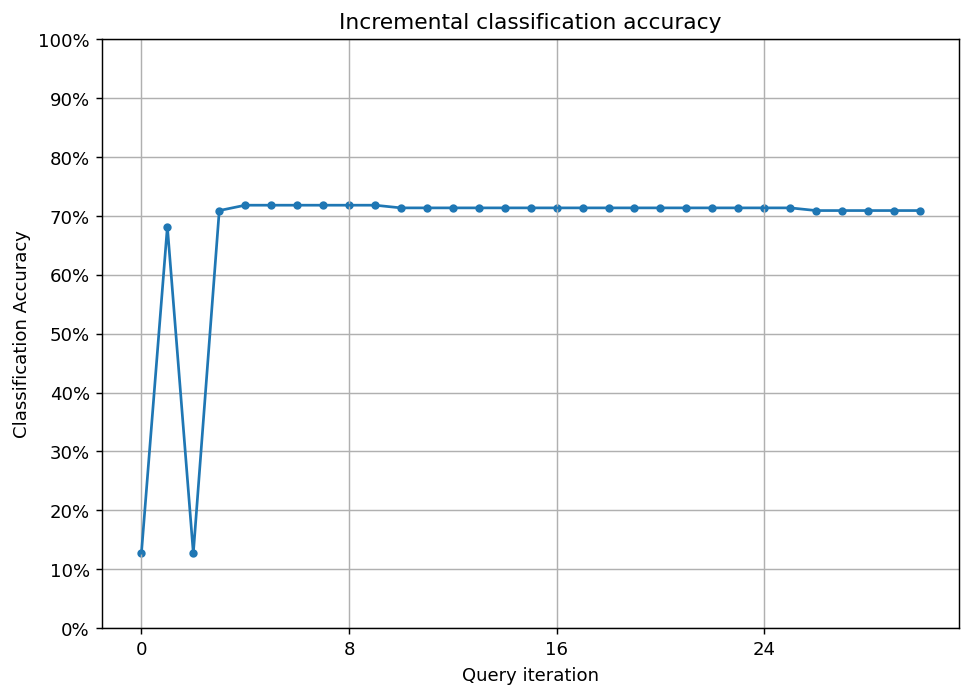

In [54]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_atheism_entropy_sampling)
ax.scatter(range(len(performance_history_atheism_entropy_sampling)), performance_history_atheism_entropy_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 3. Climate

# 3.1 uncertainty_sampling

In [55]:
X_train_climate_uncertainty = np.asarray([stance for stance in training_data_Climate["Tweet"]])
Y_train_climate_uncertainty = np.asarray([stance for stance in training_data_Climate["Stance"]])
X_test_climate_uncertainty = np.asarray([stance for stance in testing_data_Climate["Tweet"]])
Y_test_climate_uncertainty = np.asarray([stance for stance in testing_data_Climate["Stance"]])

In [56]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_climate_uncertainty.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_climate_uncertainty[training_indices]
y_training = Y_train_climate_uncertainty[training_indices]
X_pool = np.delete(X_train_climate_uncertainty,training_indices,axis=0)
y_pool = np.delete(Y_train_climate_uncertainty,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_climate_uncertainty)
X_pool_tifd = vectorizer.transform(X_pool)

In [57]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=uncertainty_sampling
)
unqueried_score = learner.score(X_testing, Y_test_climate_uncertainty)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [58]:
N_QUERIES = 19
performance_history_climate_uncertainty_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances = 20)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_climate_uncertainty)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_climate_uncertainty_sampling.append(model_accuracy)

Accuracy after query 1: 0.7101
Accuracy after query 2: 0.7278
Accuracy after query 3: 0.7278
Accuracy after query 4: 0.7219
Accuracy after query 5: 0.7278
Accuracy after query 6: 0.6864
Accuracy after query 7: 0.6746
Accuracy after query 8: 0.6746
Accuracy after query 9: 0.6805
Accuracy after query 10: 0.6805
Accuracy after query 11: 0.6923
Accuracy after query 12: 0.6805
Accuracy after query 13: 0.6805
Accuracy after query 14: 0.6805
Accuracy after query 15: 0.6805
Accuracy after query 16: 0.6805
Accuracy after query 17: 0.6805
Accuracy after query 18: 0.6805
Accuracy after query 19: 0.6805


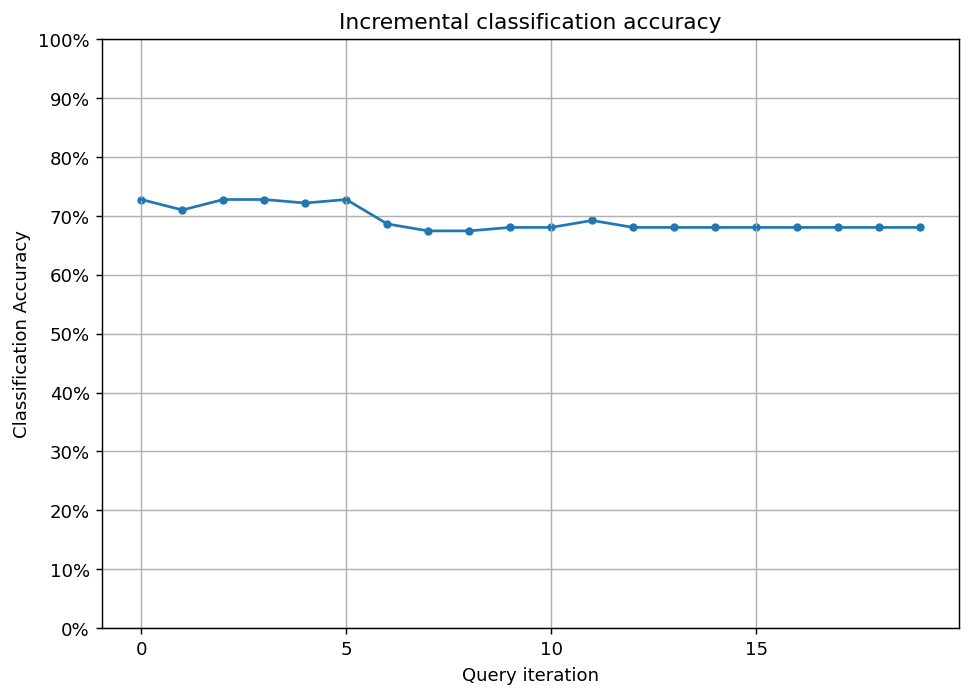

In [59]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_climate_uncertainty_sampling)
ax.scatter(range(len(performance_history_climate_uncertainty_sampling)), performance_history_climate_uncertainty_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 3.2 margin_sampling

In [60]:
X_train_climate_margin = np.asarray([stance for stance in training_data_Climate["Tweet"]])
Y_train_climate_margin = np.asarray([stance for stance in training_data_Climate["Stance"]])
X_test_climate_margin = np.asarray([stance for stance in testing_data_Climate["Tweet"]])
Y_test_climate_margin = np.asarray([stance for stance in testing_data_Climate["Stance"]])

In [61]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_climate_margin.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_climate_margin[training_indices]
y_training = Y_train_climate_margin[training_indices]
X_pool = np.delete(X_train_climate_margin,training_indices,axis=0)
y_pool = np.delete(Y_train_climate_margin,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_climate_margin)
X_pool_tifd = vectorizer.transform(X_pool)

In [62]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=margin_sampling
)
unqueried_score = learner.score(X_testing, Y_test_climate_margin)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [63]:
N_QUERIES = 19
performance_history_climate_margin_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances = 20)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_climate_margin)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_climate_margin_sampling.append(model_accuracy)

Accuracy after query 1: 0.7101
Accuracy after query 2: 0.7278
Accuracy after query 3: 0.7278
Accuracy after query 4: 0.7278
Accuracy after query 5: 0.6864
Accuracy after query 6: 0.6864
Accuracy after query 7: 0.6923
Accuracy after query 8: 0.6982
Accuracy after query 9: 0.6982
Accuracy after query 10: 0.7041
Accuracy after query 11: 0.6923
Accuracy after query 12: 0.6923
Accuracy after query 13: 0.6923
Accuracy after query 14: 0.6923
Accuracy after query 15: 0.6864
Accuracy after query 16: 0.6923
Accuracy after query 17: 0.6923
Accuracy after query 18: 0.6864
Accuracy after query 19: 0.6864


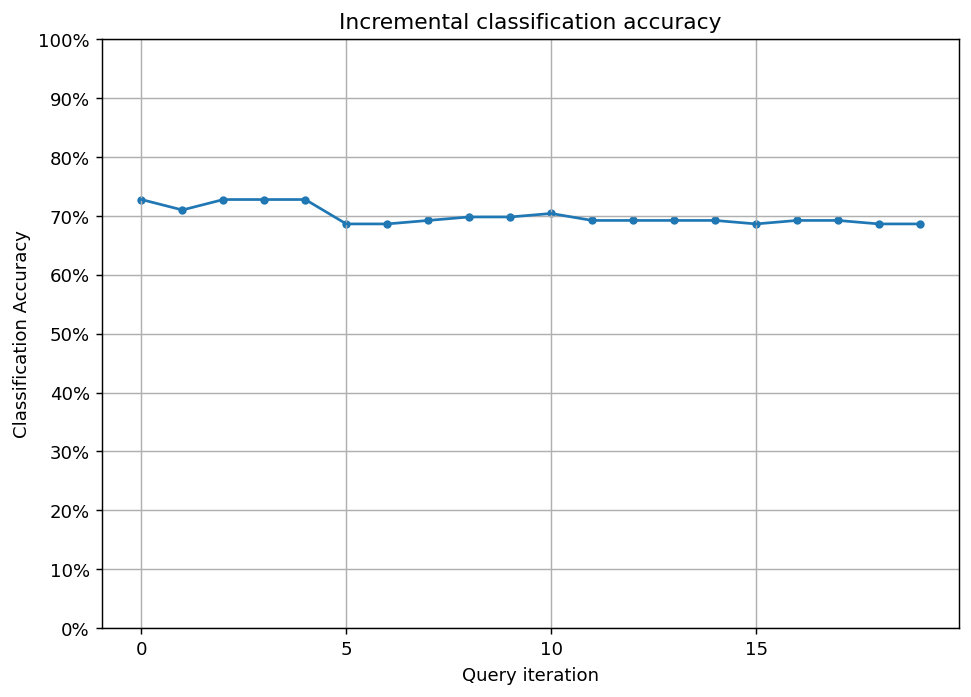

In [64]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_climate_margin_sampling)

ax.scatter(range(len(performance_history_climate_margin_sampling)), performance_history_climate_margin_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 3.3 entropy_sampling

In [65]:
X_train_climate_entropy = np.asarray([stance for stance in training_data_Climate["Tweet"]])
Y_train_climate_entropy = np.asarray([stance for stance in training_data_Climate["Stance"]])
X_test_climate_entropy = np.asarray([stance for stance in testing_data_Climate["Tweet"]])
Y_test_climate_entropy = np.asarray([stance for stance in testing_data_Climate["Stance"]])

In [66]:
X_train_climate_entropy.shape

(395,)

In [67]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_climate_entropy.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_climate_entropy[training_indices]
y_training = Y_train_climate_entropy[training_indices]
X_pool = np.delete(X_train_climate_entropy,training_indices,axis=0)
y_pool = np.delete(Y_train_climate_entropy,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_climate_entropy)
X_pool_tifd = vectorizer.transform(X_pool)

In [68]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=entropy_sampling
)
unqueried_score = learner.score(X_testing, Y_test_climate_entropy)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [69]:
N_QUERIES = 19
performance_history_climate_entropy_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances = 20)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_climate_entropy)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_climate_entropy_sampling.append(model_accuracy)

Accuracy after query 1: 0.7101
Accuracy after query 2: 0.7278
Accuracy after query 3: 0.7278
Accuracy after query 4: 0.7278
Accuracy after query 5: 0.7278
Accuracy after query 6: 0.7337
Accuracy after query 7: 0.7337
Accuracy after query 8: 0.7337
Accuracy after query 9: 0.7337
Accuracy after query 10: 0.7337
Accuracy after query 11: 0.7337
Accuracy after query 12: 0.7160
Accuracy after query 13: 0.7456
Accuracy after query 14: 0.7041
Accuracy after query 15: 0.7041
Accuracy after query 16: 0.7041
Accuracy after query 17: 0.7278
Accuracy after query 18: 0.7456
Accuracy after query 19: 0.7456


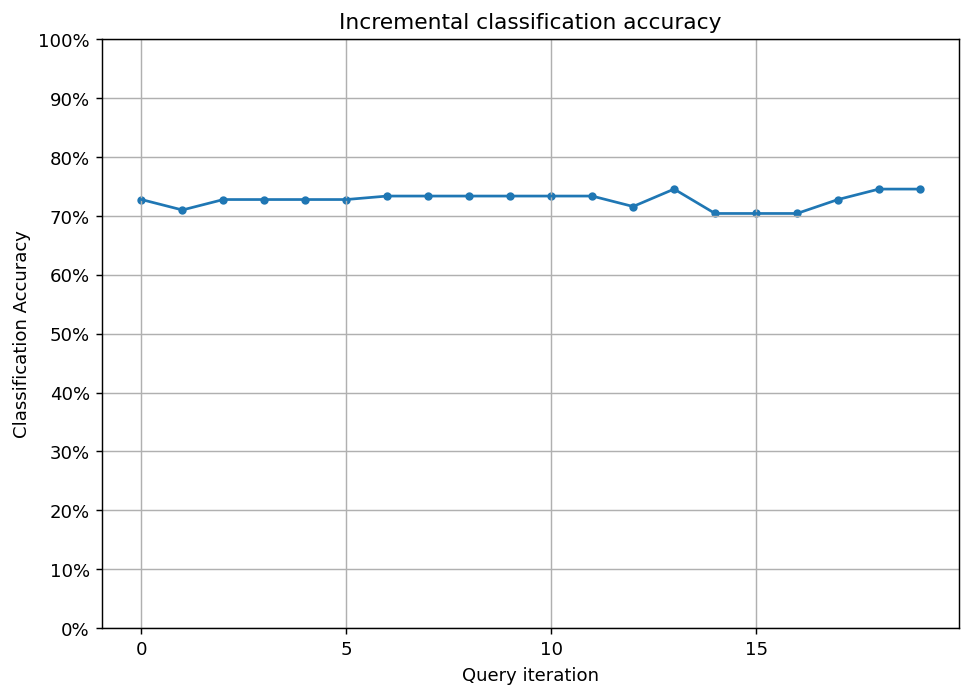

In [70]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_climate_entropy_sampling)

ax.scatter(range(len(performance_history_climate_entropy_sampling)), performance_history_climate_entropy_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 4.Feminist

# 4.1 uncertainty_sample

In [71]:
X_train_feminist_uncertainty = np.asarray([stance for stance in training_data_Feminist["Tweet"]])
Y_train_feminist_uncertainty = np.asarray([stance for stance in training_data_Feminist["Stance"]])
X_test_feminist_uncertainty = np.asarray([stance for stance in testing_data_Feminist["Tweet"]])
Y_test_feminist_uncertainty = np.asarray([stance for stance in testing_data_Feminist["Stance"]])

In [72]:
X_train_feminist_uncertainty.shape

(664,)

In [73]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_feminist_uncertainty.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_feminist_uncertainty[training_indices]
y_training = Y_train_feminist_uncertainty[training_indices]
X_pool = np.delete(X_train_feminist_uncertainty,training_indices,axis=0)
y_pool = np.delete(Y_train_feminist_uncertainty,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_feminist_uncertainty)
X_pool_tifd = vectorizer.transform(X_pool)

In [74]:
Y_test_feminist_uncertainty.shape

(285,)

In [75]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=uncertainty_sampling
)
unqueried_score = learner.score(X_testing, Y_test_feminist_uncertainty)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [76]:
N_QUERIES = 20
performance_history_feminist_uncertainty_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=30)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_feminist_uncertainty)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_feminist_uncertainty_sampling.append(model_accuracy)

Accuracy after query 1: 0.2035
Accuracy after query 2: 0.5158
Accuracy after query 3: 0.5509
Accuracy after query 4: 0.5088
Accuracy after query 5: 0.5509
Accuracy after query 6: 0.5544
Accuracy after query 7: 0.5544
Accuracy after query 8: 0.5544
Accuracy after query 9: 0.5649
Accuracy after query 10: 0.5825
Accuracy after query 11: 0.6281
Accuracy after query 12: 0.6316
Accuracy after query 13: 0.6316
Accuracy after query 14: 0.6421
Accuracy after query 15: 0.6421
Accuracy after query 16: 0.6421
Accuracy after query 17: 0.6421
Accuracy after query 18: 0.6421
Accuracy after query 19: 0.6421
Accuracy after query 20: 0.6421


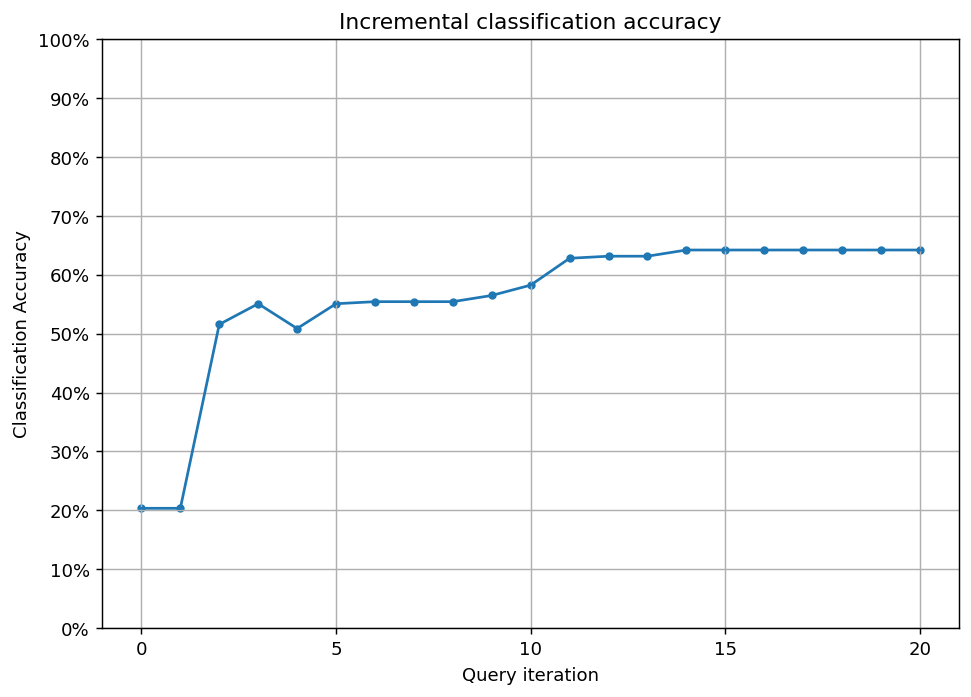

In [77]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_feminist_uncertainty_sampling)

ax.scatter(range(len(performance_history_feminist_uncertainty_sampling)), performance_history_feminist_uncertainty_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 4.2 margin_sampling

In [78]:
X_train_feminist_margin = np.asarray([stance for stance in training_data_Feminist["Tweet"]])
Y_train_feminist_margin = np.asarray([stance for stance in training_data_Feminist["Stance"]])
X_test_feminist_margin = np.asarray([stance for stance in testing_data_Feminist["Tweet"]])
Y_test_feminist_margin = np.asarray([stance for stance in testing_data_Feminist["Stance"]])

In [79]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_feminist_margin.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_feminist_margin[training_indices]
y_training = Y_train_feminist_margin[training_indices]
X_pool = np.delete(X_train_feminist_margin,training_indices,axis=0)
y_pool = np.delete(Y_train_feminist_margin,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_feminist_margin)
X_pool_tifd = vectorizer.transform(X_pool)

In [80]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=margin_sampling
)
unqueried_score = learner.score(X_testing, Y_test_feminist_margin)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [81]:
N_QUERIES = 20
performance_history_feminist_margin_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=30)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_feminist_margin)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_feminist_margin_sampling.append(model_accuracy)

Accuracy after query 1: 0.2035
Accuracy after query 2: 0.5158
Accuracy after query 3: 0.5474
Accuracy after query 4: 0.5053
Accuracy after query 5: 0.5158
Accuracy after query 6: 0.5158
Accuracy after query 7: 0.5193
Accuracy after query 8: 0.5298
Accuracy after query 9: 0.5368
Accuracy after query 10: 0.5825
Accuracy after query 11: 0.5789
Accuracy after query 12: 0.5860
Accuracy after query 13: 0.5895
Accuracy after query 14: 0.5895
Accuracy after query 15: 0.6421
Accuracy after query 16: 0.6421
Accuracy after query 17: 0.5860
Accuracy after query 18: 0.6386
Accuracy after query 19: 0.5895
Accuracy after query 20: 0.6386


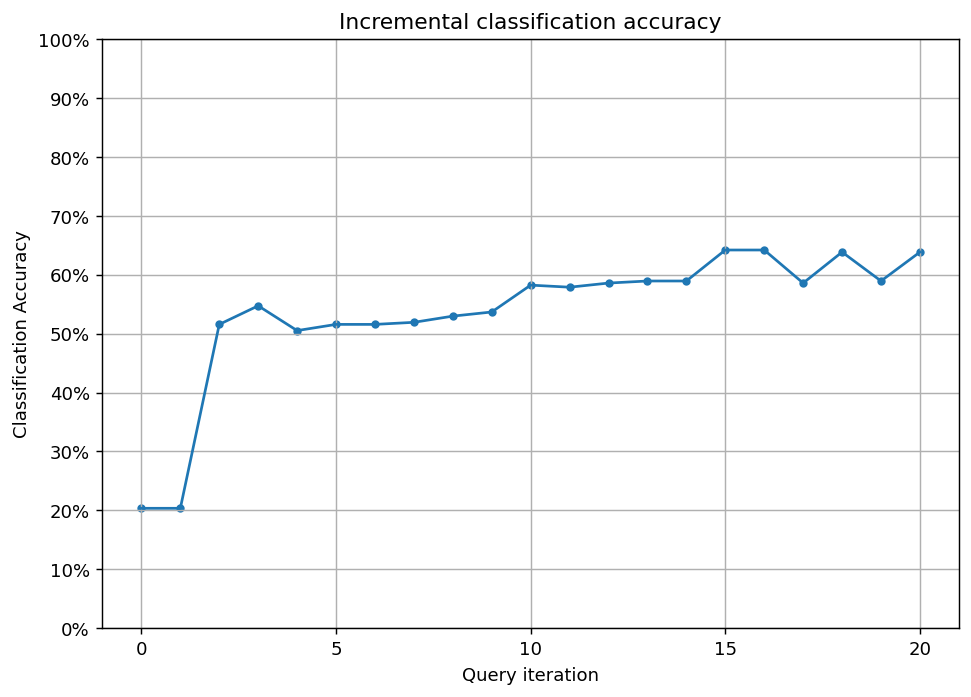

In [82]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_feminist_margin_sampling)

ax.scatter(range(len(performance_history_feminist_margin_sampling)), performance_history_feminist_margin_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 4.3 entropy_sampling

In [83]:
X_train_feminist_entropy = np.asarray([stance for stance in training_data_Feminist["Tweet"]])
Y_train_feminist_entropy = np.asarray([stance for stance in training_data_Feminist["Stance"]])
X_test_feminist_entropy = np.asarray([stance for stance in testing_data_Feminist["Tweet"]])
Y_test_feminist_entropy = np.asarray([stance for stance in testing_data_Feminist["Stance"]])

In [84]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_feminist_entropy.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_feminist_entropy[training_indices]
y_training = Y_train_feminist_entropy[training_indices]
X_pool = np.delete(X_train_feminist_entropy,training_indices,axis=0)
y_pool = np.delete(Y_train_feminist_entropy,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_feminist_entropy)
X_pool_tifd = vectorizer.transform(X_pool)

In [85]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=entropy_sampling
)
unqueried_score = learner.score(X_testing, Y_test_feminist_entropy)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [86]:
N_QUERIES = 20
performance_history_feminist_entropy_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=30)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_feminist_entropy)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_feminist_entropy_sampling.append(model_accuracy)

Accuracy after query 1: 0.2035
Accuracy after query 2: 0.5123
Accuracy after query 3: 0.5579
Accuracy after query 4: 0.5158
Accuracy after query 5: 0.5579
Accuracy after query 6: 0.5649
Accuracy after query 7: 0.5579
Accuracy after query 8: 0.5684
Accuracy after query 9: 0.5684
Accuracy after query 10: 0.6246
Accuracy after query 11: 0.6386
Accuracy after query 12: 0.6386
Accuracy after query 13: 0.6281
Accuracy after query 14: 0.6351
Accuracy after query 15: 0.6316
Accuracy after query 16: 0.6351
Accuracy after query 17: 0.6351
Accuracy after query 18: 0.6386
Accuracy after query 19: 0.6386
Accuracy after query 20: 0.6421


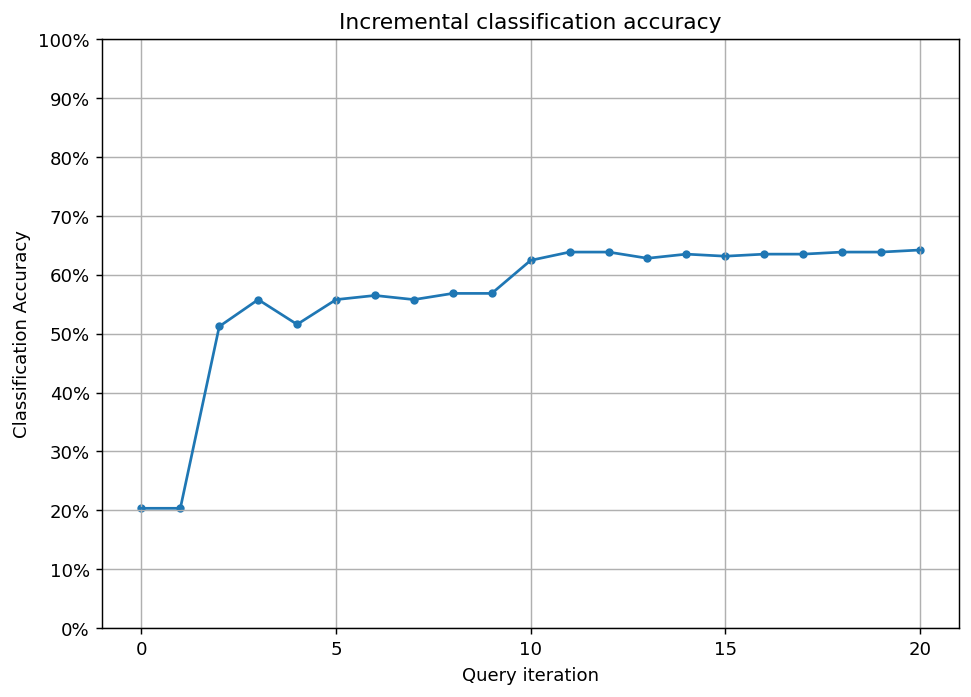

In [87]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_feminist_entropy_sampling)

ax.scatter(range(len(performance_history_feminist_entropy_sampling)), performance_history_feminist_entropy_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 5. Hillary Clinton

# 5.1 uncertainty_sampling

In [88]:
X_train_hillary_uncertainty = np.asarray([stance for stance in training_data_Hillary["Tweet"]])
Y_train_hillary_uncertainty = np.asarray([stance for stance in training_data_Hillary["Stance"]])
X_test_hillary_uncertainty = np.asarray([stance for stance in testing_data_Hillary["Tweet"]])
Y_test_hillary_uncertainty = np.asarray([stance for stance in testing_data_Hillary["Stance"]])

In [89]:
X_test_hillary_uncertainty.shape

(295,)

In [90]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_hillary_uncertainty.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_hillary_uncertainty[training_indices]
y_training = Y_train_hillary_uncertainty[training_indices]
X_pool = np.delete(X_train_hillary_uncertainty,training_indices,axis=0)
y_pool = np.delete(Y_train_hillary_uncertainty,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_hillary_uncertainty)
X_pool_tifd = vectorizer.transform(X_pool)

In [91]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=uncertainty_sampling
)
unqueried_score = learner.score(X_testing, Y_test_hillary_uncertainty)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [92]:
N_QUERIES = 20
performance_history_hillary_uncertainty_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=14)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_hillary_uncertainty)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_hillary_uncertainty_sampling.append(model_accuracy)

Accuracy after query 1: 0.5831
Accuracy after query 2: 0.5831
Accuracy after query 3: 0.5797
Accuracy after query 4: 0.5831
Accuracy after query 5: 0.5831
Accuracy after query 6: 0.5831
Accuracy after query 7: 0.5831
Accuracy after query 8: 0.5831
Accuracy after query 9: 0.5864
Accuracy after query 10: 0.5864
Accuracy after query 11: 0.5864
Accuracy after query 12: 0.5864
Accuracy after query 13: 0.5864
Accuracy after query 14: 0.5864
Accuracy after query 15: 0.5831
Accuracy after query 16: 0.5831
Accuracy after query 17: 0.5831
Accuracy after query 18: 0.5831
Accuracy after query 19: 0.5831
Accuracy after query 20: 0.5831


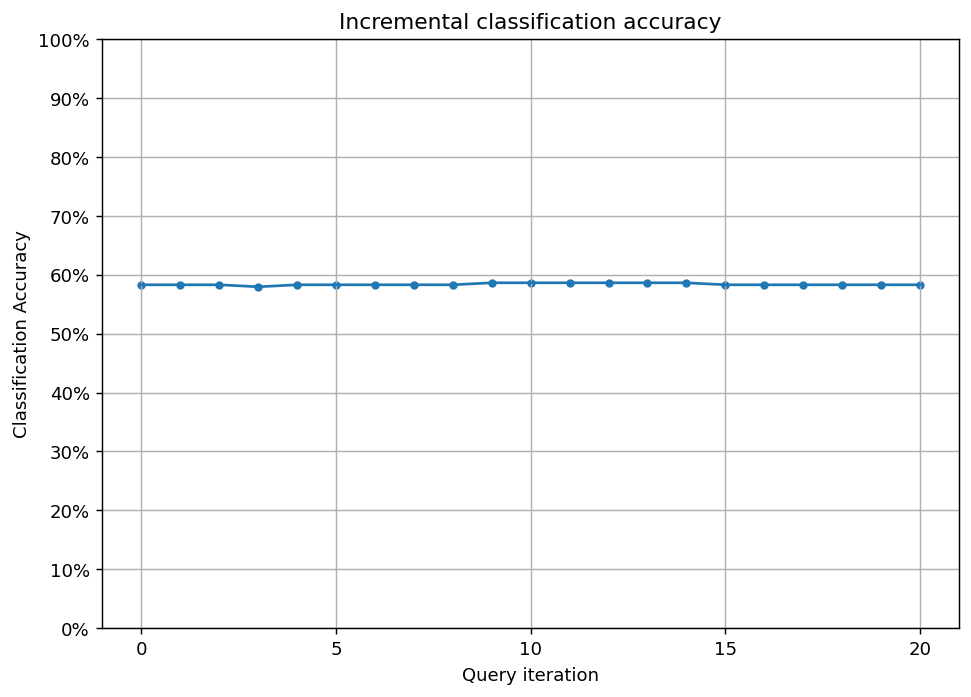

In [93]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_hillary_uncertainty_sampling)

ax.scatter(range(len(performance_history_hillary_uncertainty_sampling)), performance_history_hillary_uncertainty_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 5.2 margin_sampling

In [94]:
X_train_hillary_margin = np.asarray([stance for stance in training_data_Hillary["Tweet"]])
Y_train_hillary_margin = np.asarray([stance for stance in training_data_Hillary["Stance"]])
X_test_hillary_margin = np.asarray([stance for stance in testing_data_Hillary["Tweet"]])
Y_test_hillary_margin = np.asarray([stance for stance in testing_data_Hillary["Stance"]])

In [95]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_hillary_margin.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_hillary_margin[training_indices]
y_training = Y_train_hillary_margin[training_indices]
X_pool = np.delete(X_train_hillary_margin,training_indices,axis=0)
y_pool = np.delete(Y_train_hillary_margin,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_hillary_margin)
X_pool_tifd = vectorizer.transform(X_pool)

In [96]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=margin_sampling
)
unqueried_score = learner.score(X_testing, Y_test_hillary_margin)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [97]:
N_QUERIES = 20
performance_history_hillary_margin_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=14)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_hillary_margin)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_hillary_margin_sampling.append(model_accuracy)

Accuracy after query 1: 0.5831
Accuracy after query 2: 0.5831
Accuracy after query 3: 0.5797
Accuracy after query 4: 0.5831
Accuracy after query 5: 0.5831
Accuracy after query 6: 0.5831
Accuracy after query 7: 0.5831
Accuracy after query 8: 0.5831
Accuracy after query 9: 0.5831
Accuracy after query 10: 0.5831
Accuracy after query 11: 0.5831
Accuracy after query 12: 0.5831
Accuracy after query 13: 0.5831
Accuracy after query 14: 0.5831
Accuracy after query 15: 0.5831
Accuracy after query 16: 0.5831
Accuracy after query 17: 0.5831
Accuracy after query 18: 0.5831
Accuracy after query 19: 0.5831
Accuracy after query 20: 0.5831


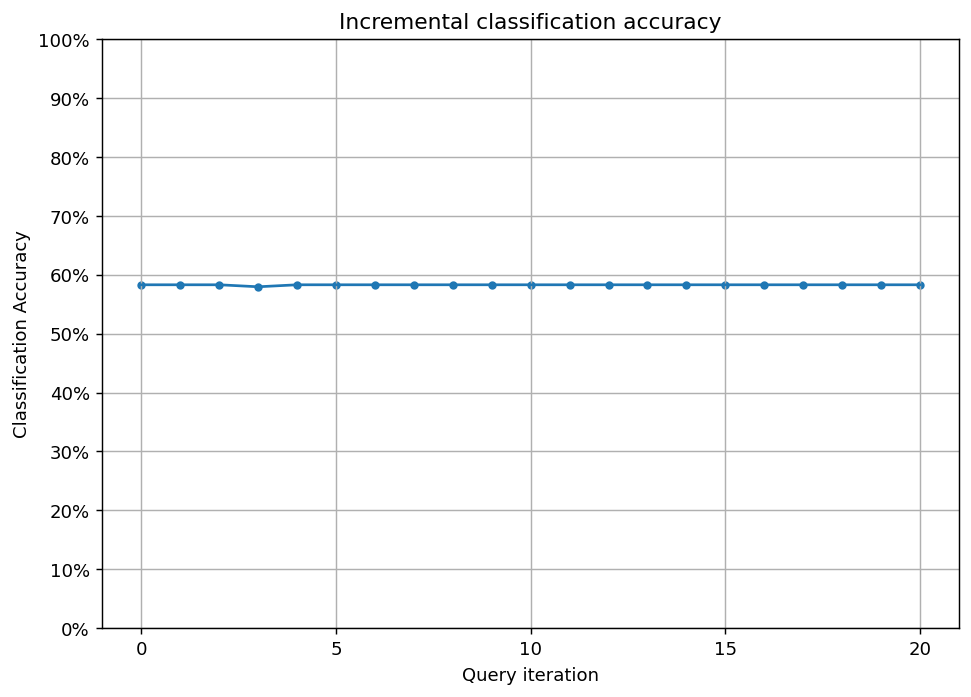

In [98]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_hillary_margin_sampling)

ax.scatter(range(len(performance_history_hillary_margin_sampling)), performance_history_hillary_margin_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

# 5.3 entropy_sampling

In [99]:
X_train_hillary_entropy = np.asarray([stance for stance in training_data_Hillary["Tweet"]])
Y_train_hillary_entropy = np.asarray([stance for stance in training_data_Hillary["Stance"]])
X_test_hillary_entropy = np.asarray([stance for stance in testing_data_Hillary["Tweet"]])
Y_test_hillary_entropy = np.asarray([stance for stance in testing_data_Hillary["Stance"]])

In [100]:
import numpy as np

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_train_hillary_entropy.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=3)

X_training = X_train_hillary_entropy[training_indices]
y_training = Y_train_hillary_entropy[training_indices]
X_pool = np.delete(X_train_hillary_entropy,training_indices,axis=0)
y_pool = np.delete(Y_train_hillary_entropy,training_indices,axis=0)
X_training = vectorizer.fit_transform(X_training)
X_testing = vectorizer.transform(X_test_hillary_entropy)
X_pool_tifd = vectorizer.transform(X_pool)

In [101]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
# initializing the learner
learner = ActiveLearner(
    estimator=SVC(kernel="rbf",probability=True),
    X_training=X_training, y_training=y_training,
    query_strategy=entropy_sampling
)
unqueried_score = learner.score(X_testing, Y_test_hillary_entropy)
X_pool_tifd=X_pool_tifd.todense()
X_pool_tifd = np.asarray(X_pool_tifd)

In [102]:
N_QUERIES = 20
performance_history_hillary_entropy_sampling = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool_tifd,n_instances=14)
    X = X_pool[query_index]
    X = vectorizer.transform(X)
    y = y_pool[query_index]
    learner.teach(X=X,y=y)
    X_pool_tifd = np.delete(X_pool_tifd,query_index,axis=0)
    y_pool = np.delete(y_pool,query_index,axis=0)
    model_accuracy = learner.score(X_testing, Y_test_hillary_entropy)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))
    performance_history_hillary_entropy_sampling.append(model_accuracy)

Accuracy after query 1: 0.5831
Accuracy after query 2: 0.5831
Accuracy after query 3: 0.5797
Accuracy after query 4: 0.5831
Accuracy after query 5: 0.5831
Accuracy after query 6: 0.5831
Accuracy after query 7: 0.5831
Accuracy after query 8: 0.5831
Accuracy after query 9: 0.5831
Accuracy after query 10: 0.5831
Accuracy after query 11: 0.5831
Accuracy after query 12: 0.5831
Accuracy after query 13: 0.5831
Accuracy after query 14: 0.5831
Accuracy after query 15: 0.5831
Accuracy after query 16: 0.5831
Accuracy after query 17: 0.5831
Accuracy after query 18: 0.5831
Accuracy after query 19: 0.5831
Accuracy after query 20: 0.5797


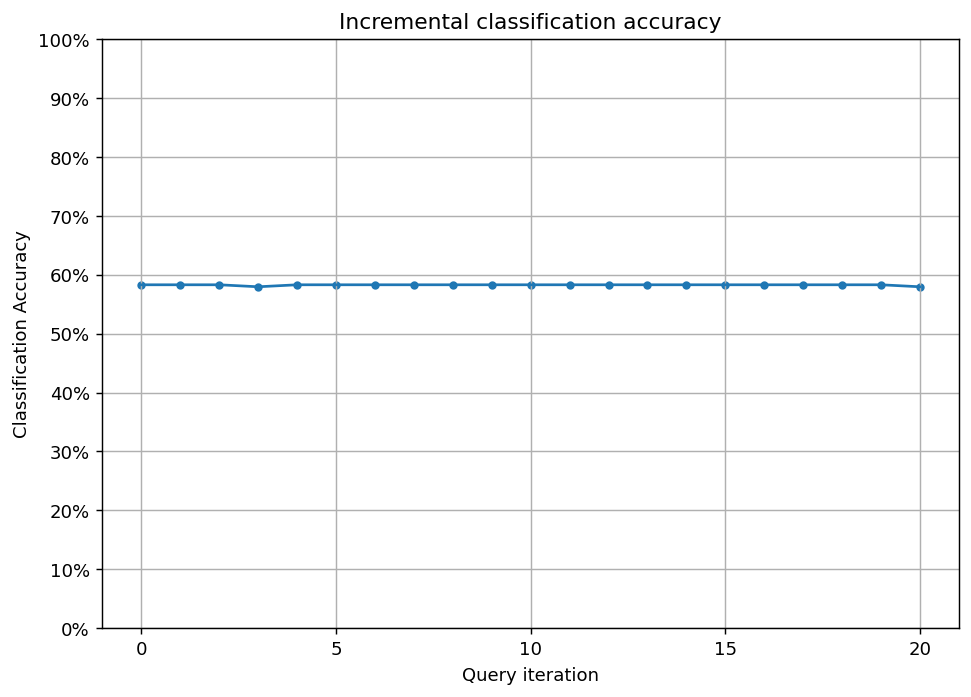

In [103]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history_hillary_entropy_sampling)

ax.scatter(range(len(performance_history_hillary_entropy_sampling)), performance_history_hillary_entropy_sampling, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()